# Exploring raw data
This lab will continue our topic from this weeks class - exploring raw data.

Before you perform any analysis on *any* dataset, you should always take a look at the data in its "raw" form. This is crucial for a number of reasons. Looking at the data before you've done anything to it lets you:

1. Have a sanity check that it looks the way it should
2. Note any datapoints that seem like they're outliers
3. Find any sensors that are noisy or unreliable
4. Give a global-level view of what your dataset looks like

And a bunch of other stuff too.

# The dataset
In lecture we discussed Electroencephalography (EEG), in which electrodes are placed on a person's scalp in order to record electrical activity coming from the brain.

This lab will use a related (but different) dataset using a method called *electrocorticography*. This is a recording taken from the brain surface of a patient getting surgery for epilepsy.

Each sensor is an electrode placed on the "cortical surface" of the patient's brain. We are recording the electrical activity their brain produces as they sit in the Intensive Care Unit (ICU)

In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import neurods as nds
%matplotlib notebook

# 1 - Loading and simple plotting
First we'll use the datascience package to look at a few subsets of the data.

* Using the data path below, load the data into memory.
* Then, convert this object into a Table.

In [3]:
# The path to the new dataset can be found here:
path_to_data = '../../data/ecog/ecog_sample/ecog_sample_full-raw.fif'

# This is a dataset of electrocorticography (not EEG).
raw = mne.io.Raw(path_to_data, preload=True)

In [4]:
# Here's a helper function to convert MNE objects into Tables
raw_table = nds.mne_to_table(raw)

* Now, convert this table into two others:
  * One with seconds 5-10
  * One with seconds 160-170.
* For each table, plot channels 4, 20, 40, and 60

<IPython.core.display.Javascript object>


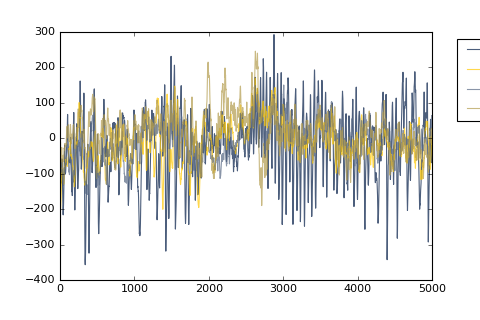

<IPython.core.display.Javascript object>


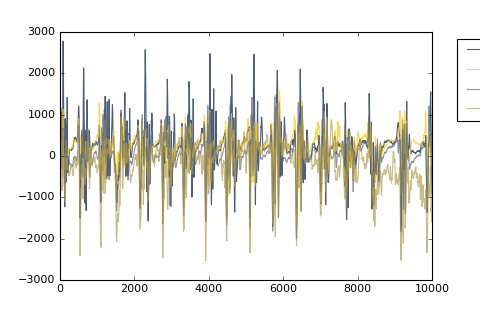

In [5]:
# 5 - 10
times = [(5, 10), (160, 170)]
chs = ['ch_4', 'ch_20', 'ch_40', 'ch_60']
for tmin, tmax in times:
    this_table = raw_table.where(
        (raw_table['time'] > tmin) * (raw_table['time'] < tmax))
    this_table = this_table.select(chs)
    this_table.plot()

* Now, try the same thing, but use the `time_mask` function in neurods. 

<IPython.core.display.Javascript object>


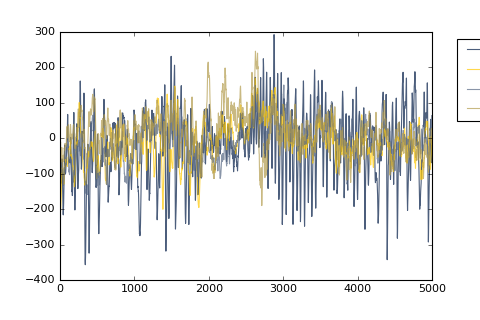

<IPython.core.display.Javascript object>


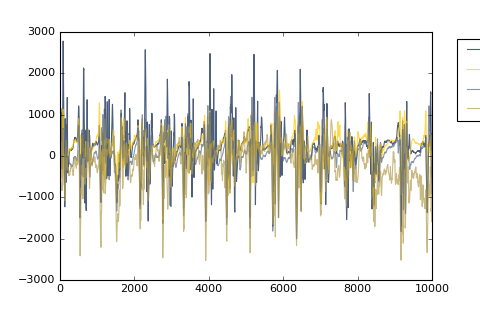

In [6]:
for tmin, tmax in times:
    this_table = raw_table.where(nds.time_mask(raw_table['time'], tmin, tmax))
    this_table = this_table.select(chs)
    this_table.plot()

### Questions
* Why do you see a difference between these two plots? What do you think is going on?

## Stacking plot traces
It's a bit hard to see these traces because they're superimposed on one another. Make another plot (from 160-170 seconds), but this time iterate through channels, plotting each channel slightly above the one before it.

In [7]:
plt_data.plot??

Object `plt_data.plot` not found.


<IPython.core.display.Javascript object>


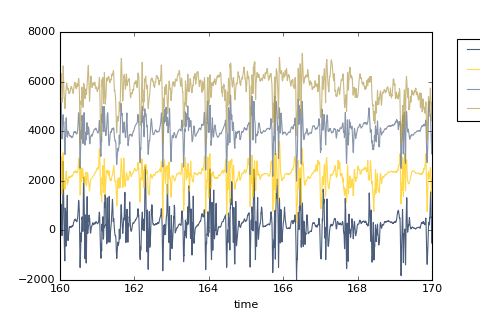

In [8]:
this_data = raw_table.where(nds.time_mask(raw_table['time'], 160, 170))
this_data = this_data.select(chs + ['time'])
for i, ch in enumerate(chs):
    this_data[ch] = this_data[ch] + 2000 * i
this_data.plot('time')

# 2 - Interactively browsing with MNE
While it's important to be able to plot data on our own, MNE has a set of plotting libraries that make our lives much easier. Here we'll explore some very basic plotting functionality and take a look at our data more quickly.

* Using the `Raw` object that we initially loaded in, use the `plot` method to browse the data interactively.

<IPython.core.display.Javascript object>


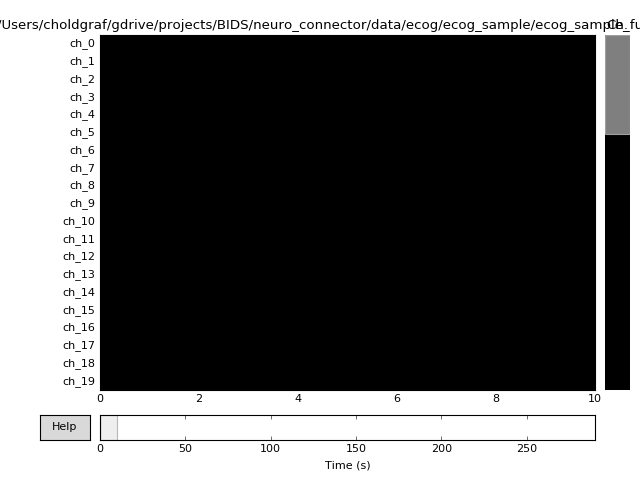

In [9]:
# If two plots show up, make sure you add a `_ = ` at the beginning of the line
_ = raw.plot()

* How does the above look, why do you think it looks that way?
* Try the same plot method, this time with an extra parameter: `scalings='auto'`

<IPython.core.display.Javascript object>


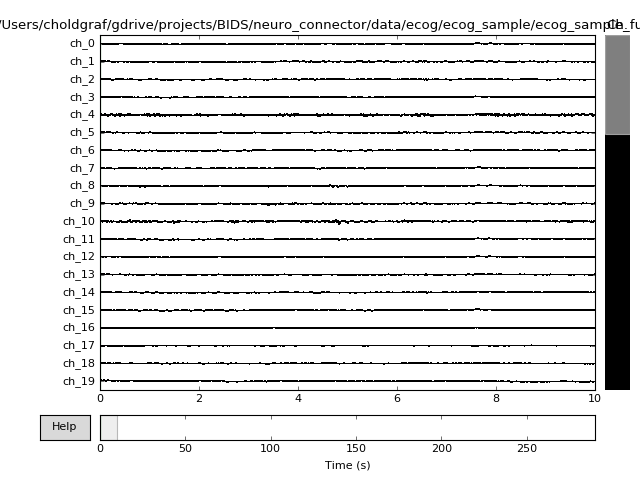

In [10]:
_ = raw.plot(scalings='auto')


That looks much better - what did you do by setting `scale='auto'`?

* Now, try to adjust the scale of the channels manually. You can do this by clicking `=` or `-` on the keyboard. Play around with this, and pick a scaling that you think works well.
* Scan through all of the timepoints, from beginning to end. You can do this with the arrow keys (left/right for timepoints, up/down for channels).
* Mark which channels seem to be noisy, put them in a list below.
* Mark time windows of interes, put them in a list as well.

In [11]:
channels = []
times = []

# Discussion questions
* What do you think happens if a channel is particularly noisy?
* What effect would a particularly noisy set of timepoints have?
* How do you think ECoG differs from EEG?
* What's going on in this dataset?
* What would be useful information to have on top of this dataset? What would allow us to ask more interesting questions?